Positive selection is a directional evolutionary force, allowing us to predict how likely it is that a beneficial  mutation will eventually become fixed in the population. The following code models both the positive selection and genetic drift.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from random import random


Bad key "text.kerning_factor" on line 4 in
/Users/haoran/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [92]:
#Set parameter 

"""
    p -- initial allele frequency of allele A
    q -- initial allele frequency of allele a
    s -- selection coefficient
    N -- population size
    ngen -- number of generation
    f_A -- allele frequency of allele A 
"""

p = 0.2
q = 1 - p
s = 0.1
WAA = 0.1 + 2*s  # fitness of AA homozygotes
WAa = 0.1 + s    #fitness of Aa heterozygotes
Waa = 0.1        #fitness of aa homozgyotes
N = 10
ngen = 200 


0.8

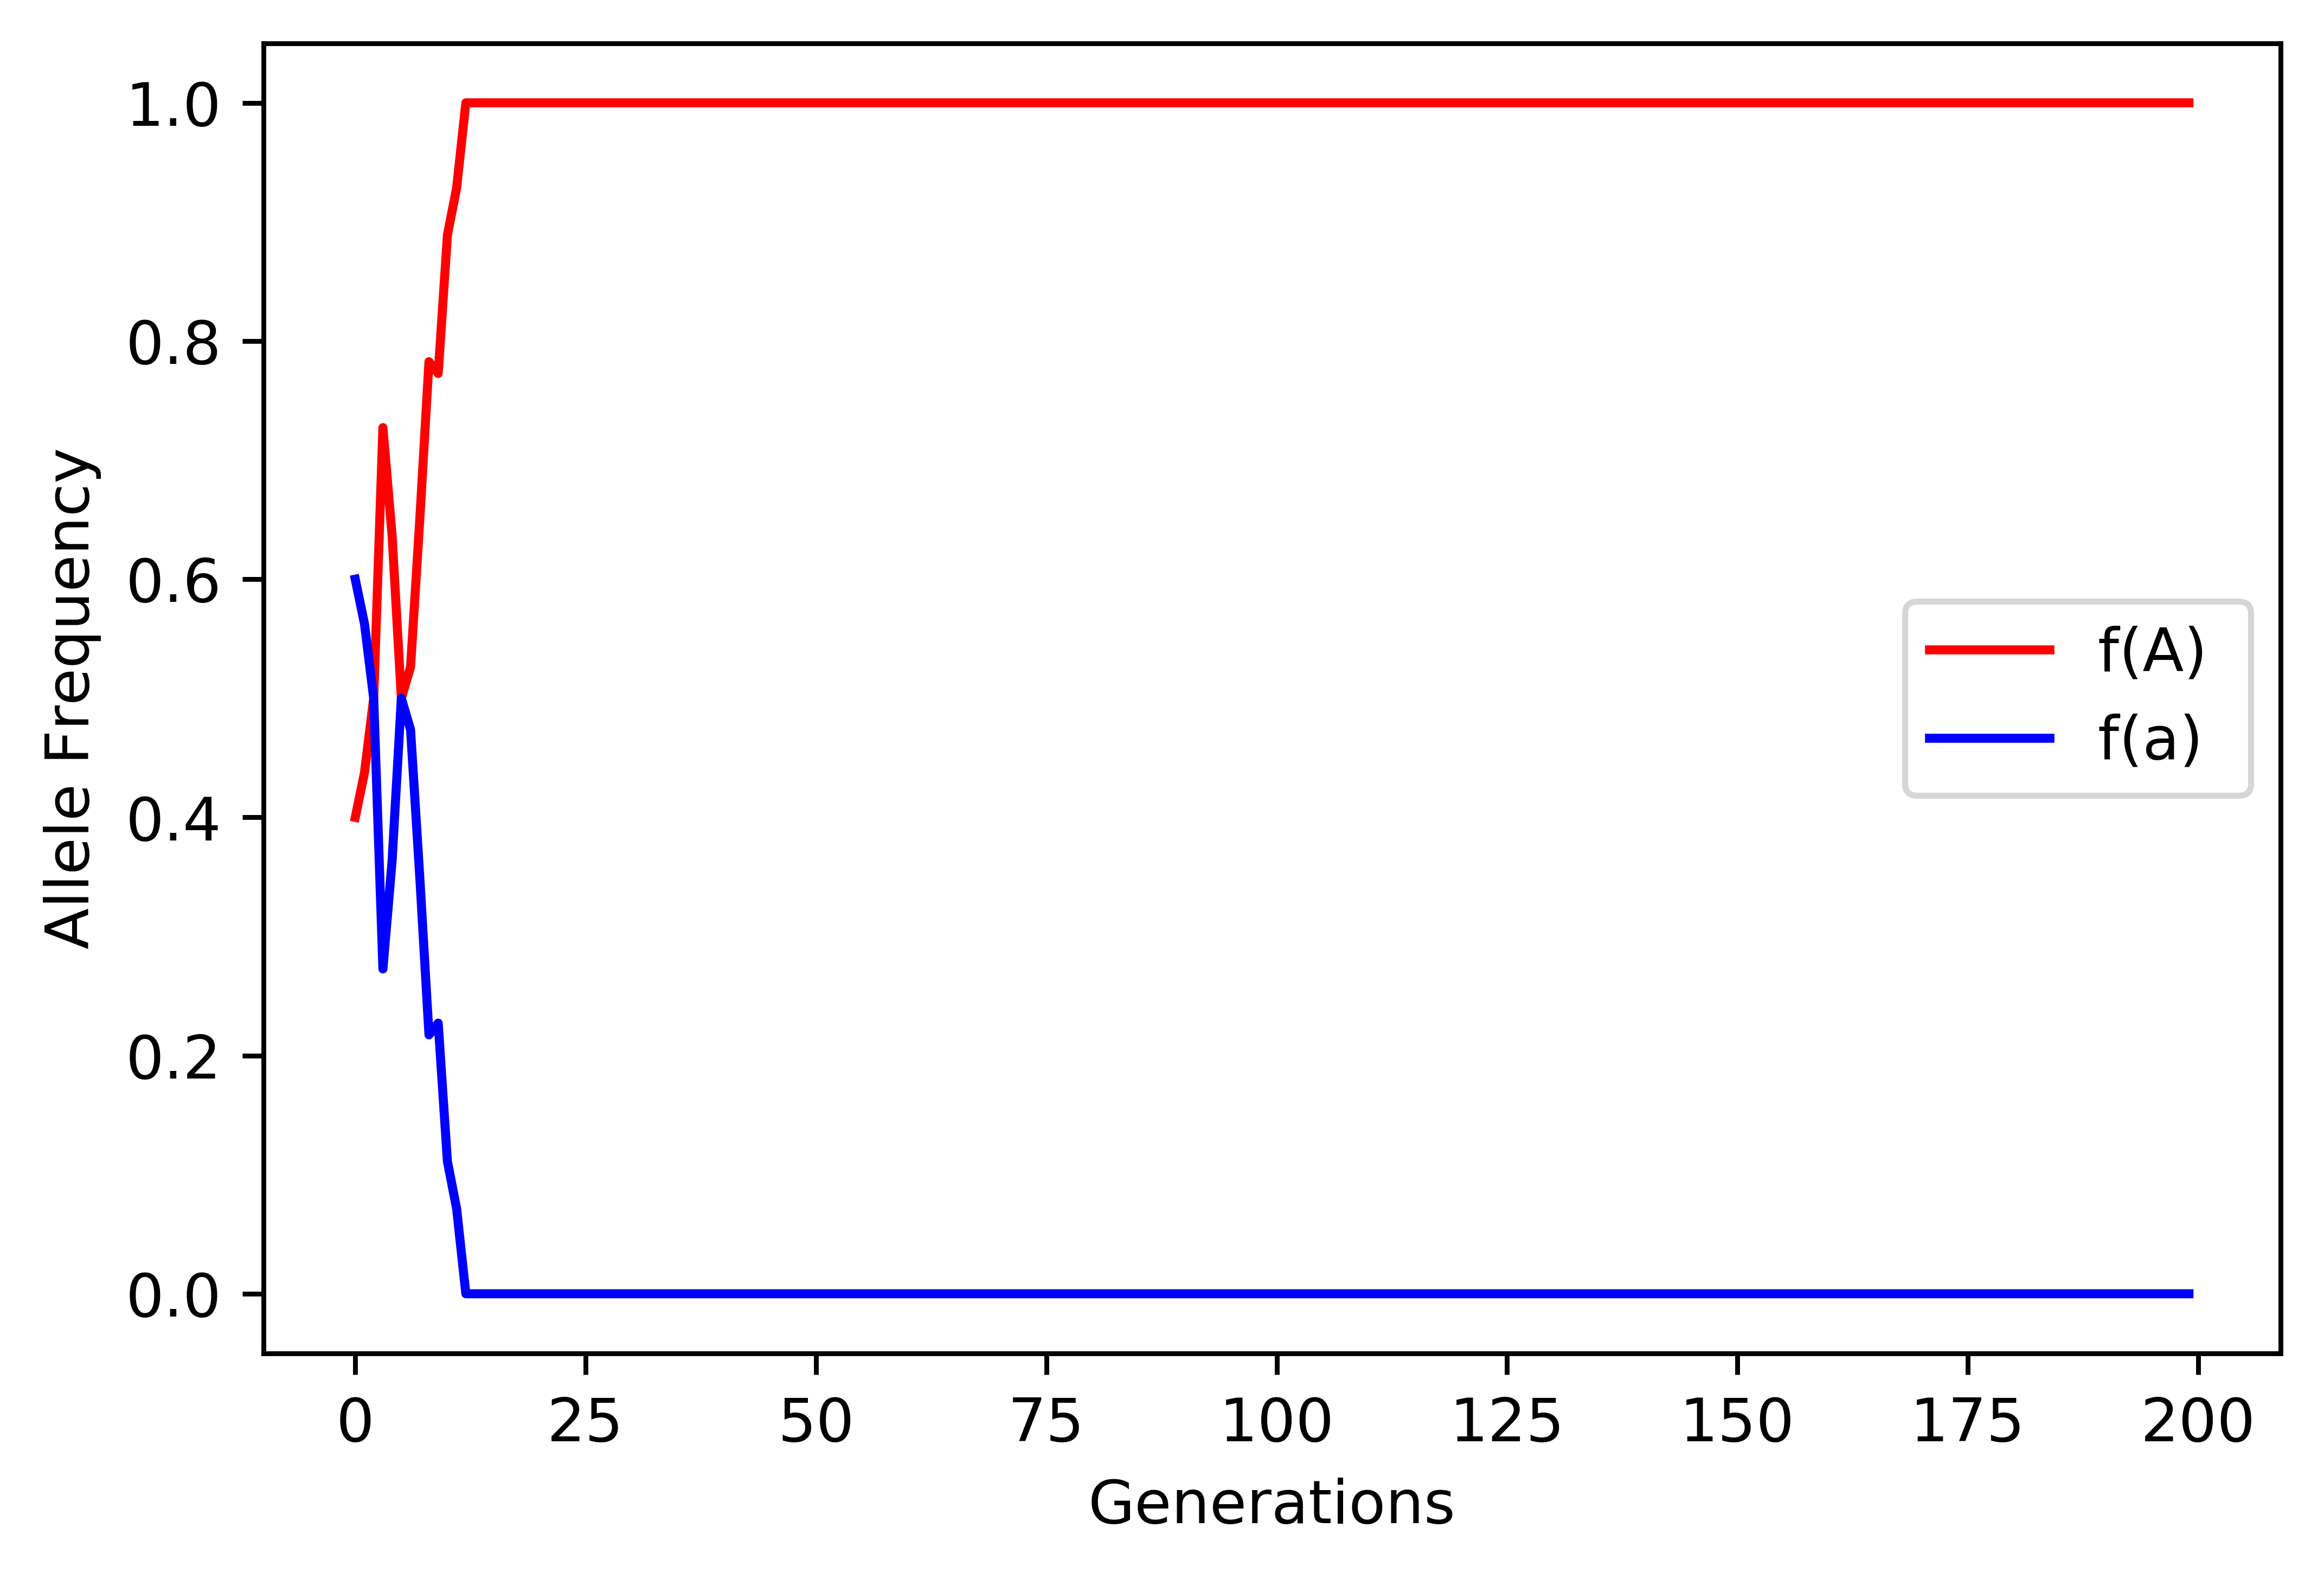

In [90]:
def random_genotype(f_A):
    if random() <= f_A:
        sperm_allele = 'A'
    else:
        sperm_allele = 'a'
    
    if random() <= f_A:
        egg_allele = 'A'
    else:
        egg_allele = 'a'
    
    genotype = sperm_allele+egg_allele
    return genotype




def simulate_random_mating(pop_sizes,f_A):
    genotypes = defaultdict(int)
    
    for i in range(pop_sizes):
        curr_genotype = random_genotype(f_A)
        genotypes[curr_genotype]+=1
    
    for g in genotypes.keys():
        genotypes[g] = genotypes[g]/float(pop_sizes)
    
    return genotypes


def simulate_genetic_drift_with_selection(n_generations,pop_sizes,f_A=0.5,
                                          WAA=1.0,WAa=1.0,Waa = 1.0):
    """Return the new frequency of A given Hardy-Weinberg equilibrium + selection"""
    generations = range(n_generations)
    allele_freqs = []
    for generation in generations:
        genotypes = None
        genotypes = simulate_random_mating(pop_sizes,f_A)
        numerator = (genotypes['AA']*WAA+\
                     0.5*genotypes['aA']*WAa+\
                     0.5*genotypes['Aa']*WAa)
        
        denominator = (genotypes['AA']*WAA+\
                       genotypes['Aa']*WAa+\
                       genotypes['aA']*WAa+\
                       genotypes['aa']*Waa)
        f_A = numerator/denominator       
        allele_freqs.append(f_A)
    return list(generations),allele_freqs




xs,ps = simulate_genetic_drift_with_selection(ngen,N,p, WAA,WAa,Waa) # get the allele frequency of allele A over time
qs = [1.0 - p for p in ps] #get the allele frequency of allele a




plt.figure(dpi=800)    
plt.plot(xs,ps,'-r',label='f(A) ')
plt.plot(xs,qs,'-b',label='f(a) ')
plt.ylabel('Allele Frequency')
plt.xlabel('Generations')
plt.legend()


If selection is weak compared to genetic drift, the stochasticity of reproduction can play a role in the trajectory an allele takes even when it is common in the population. If selection is sufficiently weak compared to genetic drift, then genetic drift will dominate the dynamics of alleles and they will behave like they’re effectively neutral. 

For a newly arising mutation to eventually get fixed, it first has to escape loss by drift when rare, because even beneficial alleles are susceptible to the stochastic effects of genetic drift when they are very rare or in a small population. Population size holds a fundamental place in understanding evolution because it influences how effective the force of positive selection is actually producing evolutionary change. 